#A binary classification of whether the food image is healthy or unhealthy through FastAI

In [1]:
# import the necessary libraries
from fastai.vision.all import *
import pandas as pd
import seaborn as sns
from fastai.vision.all import *
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# define your data path
path = Path('/content/drive/MyDrive/food --data')

In [ ]:
# create a DataBlock for your images
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.1, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(224))

In [ ]:
# create your dataloaders
dls = dblock.dataloaders(path)

In [ ]:
# create your learner
learn = cnn_learner(dls, resnet50, metrics=accuracy)

# train your model
learn.fine_tune(10)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pt

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.912196,0.527344,0.838710,01:22


epoch,train_loss,valid_loss,accuracy,time
0,0.371470,0.314853,0.895161,00:12
1,0.253260,0.222948,0.911290,00:12
2,0.190357,0.302256,0.927419,00:13
3,0.168399,0.247561,0.911290,00:13
4,0.122236,0.252501,0.911290,00:14
5,0.095595,0.095027,0.967742,00:13
6,0.070121,0.134116,0.943548,00:12
7,0.054383,0.098663,0.959677,00:13
8,0.042150,0.083106,0.959677,00:13
9,0.033040,0.080684,0.967742,00:14


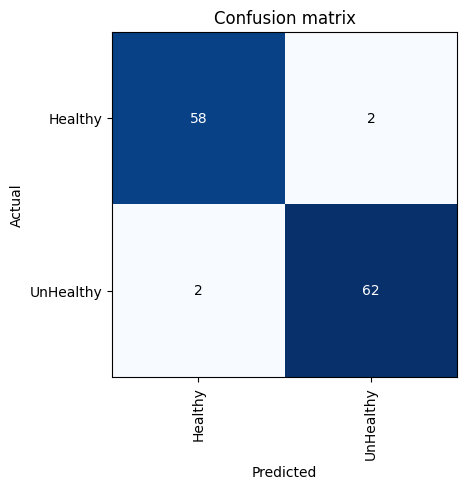

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#plot_confusion_matrix(interp.confusion_matrix(), learn.dls.vocab)
plt.show()

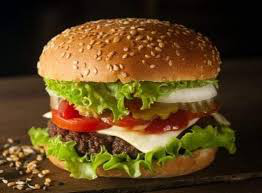

In [ ]:
# make predictions on new data
image = PILImage.create('/content/b.jpeg')
image

In [ ]:
# make predictions on new data
learn.predict('/content/b.jpeg')

('UnHealthy', TensorBase(1), TensorBase([1.9285e-09, 1.0000e+00]))

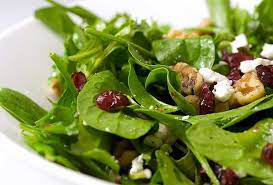

In [ ]:
# make predictions on new data
image = PILImage.create('/content/a.jpeg')
image

In [ ]:
# make predictions on new data
learn.predict('/content/a.jpeg')

('Healthy', TensorBase(0), TensorBase([9.9999e-01, 6.3657e-06]))

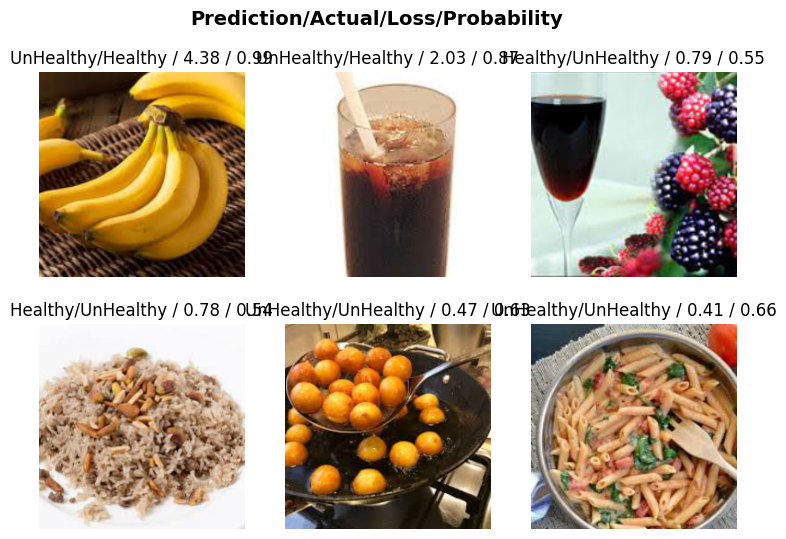

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(6)

<Axes: >

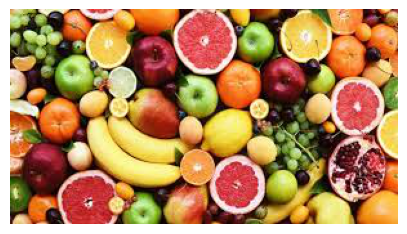

In [ ]:
import PIL
img = dls.train_ds[44][0]

show_image(img)

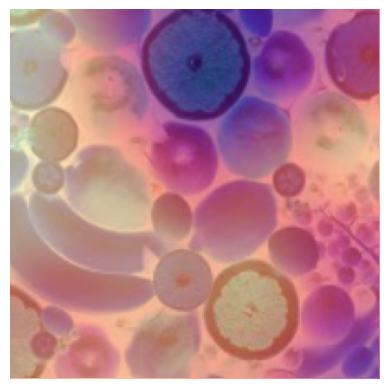

In [ ]:
img = PIL.ImageOps.invert(img)
pil_img = PIL.Image.fromarray(np.uint8(img))
x, = first(dls.test_dl([pil_img]))

class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()

hook_output = Hook()
hook = learn.model[0].register_forward_hook(hook_output.hook_func)

with torch.no_grad():
    output = learn.model.eval()(x)

act = hook_output.stored[0]

cam_map = torch.einsum('ck,hij->cij', learn.model[1][-1].weight, act)

x_dec = dls.train.decode((x,))[0][0]
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map[1].detach().cpu(), alpha=0.7, extent=(0,x.shape[3],x.shape[2],0), interpolation='bicubic', cmap='magma'); #interpolation='sinc' for all interpolation:

In [ ]:
!pip install -q gradio torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.9 MB/s eta 0:

In [ ]:
# Downloading files from the demo repo
import os
#!wget -q https://github.com/gradio-app/gradio/raw/main/demo/image_classification/cheetah.jpg

In [ ]:
import gradio as gr
import torch
import requests
from torchvision import transforms

# define your data path
path = Path('/content/drive/MyDrive/food --data')
# create a DataBlock for your images
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.1, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(224))
# create your dataloaders
dls = dblock.dataloaders(path)

# create your learner
learn = cnn_learner(dls, resnet50, metrics=accuracy)

# train your model
learn.fine_tune(1)
response = requests.get("https://git.io/JJkYN")
#labels = response.text.split("\n")
labels = ['healthy', 'unhealthy']

def predict(inp):
  inp = transforms.ToTensor()(inp).unsqueeze(0)
  with torch.no_grad():
    prediction = torch.nn.functional.softmax(model(inp)[0], dim=0)
    confidences = {labels[i]: float(prediction[i]) for i in range(1000)}    
  return confidences

demo = gr.Interface(fn=predict, 
             inputs=gr.inputs.Image(type="pil"),
             outputs=gr.outputs.Label(num_top_classes=3),
             examples=[["cheetah.jpg"]],
             )
             
demo.launch()

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.861158,0.500546,0.862903,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.408117,0.412100,0.887097,00:12


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import torch
import requests
from torchvision import transforms

# define your data path
path = Path('/content/drive/MyDrive/food --data')
# create a DataBlock for your images
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.1, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(224))
# create your dataloaders
dls = dblock.dataloaders(path)

# create your learner
learn = cnn_learner(dls, resnet50, metrics=accuracy)

# train your model
learn.fine_tune(1)
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")
#labels = response['healthy', 'unhealthy']

def predict(image_path):
  inp = transforms.ToTensor()(Image.open(image_path)).unsqueeze(0)
  with torch.no_grad():
    prediction = torch.nn.functional.softmax(model(inp)[0], dim=0)
    confidences = {labels[i]: float(prediction[i]) for i in range(1000)}    
  return confidences

demo = gr.Interface(fn=predict, 
             inputs="text",
             outputs=gr.outputs.Label(num_top_classes=3),
             examples=[["/path/to/image.jpg"]],
             )

demo.launch()


epoch,train_loss,valid_loss,accuracy,time
0,0.869463,0.471617,0.846774,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.510662,0.427202,0.903226,00:12


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>